# Data Preparation for Machine Learning

## Part V - Data Transforms

### Chapter 17: How to Scale Numerical Data

#### Tutorial Overview
This tutorial is divided into six parts, they are:
1. The Scale of Your Data Matters
2. Numerical Data Scaling Methods
3. Diabetes Dataset
4. MinMaxScaler Transform
5. StandardScaler Transform
6. Common Questions

#### The Scale of Your Data Matters
+ Differences in the scales across input variables may increase the difficulty of the problem being modeled
+ Affected:
    + a weighted sum of input variables (linear regression, logistic regression, and deep learning)
    + distance or dot products (K-nearest neighbors, support vector machines)
+ Not Affected:
    + decision trees and ensembles of trees
+ In practice, it is nearly always advantageous to apply pre-processing transformations to the input data before it is presented to a network. Similarly, the outputs of the network are often post-processed to give the required output values.

#### Numerical Data Scaling Methods
+ Data Normalization
    + Fit the scaler using available training data
    + Apply the scale to training data
    + Apply the scale to data going forward
+ Data Standardization (center scaling)
    + Standardization assumes that your observations fit a Gaussian distribution.
    + You can still standardize your data if this expectation is not met, but you may not get reliable results.
    + requires that you know or are able to accurately estimate the mean and standard deviation of observable values.
    + The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.

#### Diabetes Dataset

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

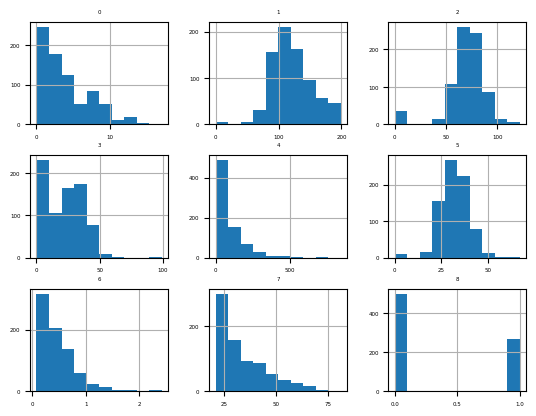

In [1]:
# load and summarize the diabetes dataset

import pandas as pd
from matplotlib import pyplot

# load the dataset
dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

In [2]:
# evaluate knn on the raw diabetes dataset

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# load the dataset
dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.717 (0.040)


In [3]:
dataset

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### MinMaxScaler Transform

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

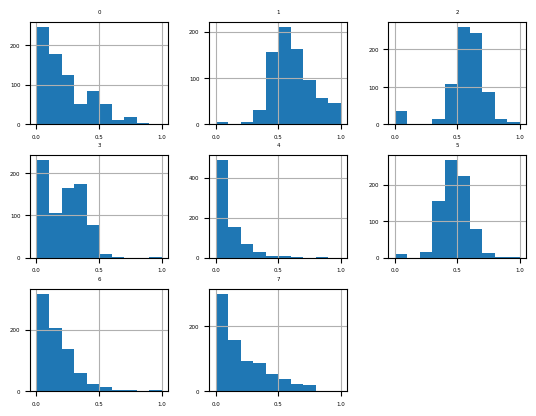

In [6]:
# visualize a minmax scaler transform of the diabetes dataset

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

# load the dataset
dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# summarize
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

Histogram plots of the variables are created, although the distributions don’t look much different from their original distributions seen in the previous section

In [9]:
# evaluate knn on the diabetes dataset with minmax scaler transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# load the dataset
dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.739 (0.053)


#### StandardScaler Transform

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18  1.503427e-17  1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.590520e-16  2.451743e-16  1.931325e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.8

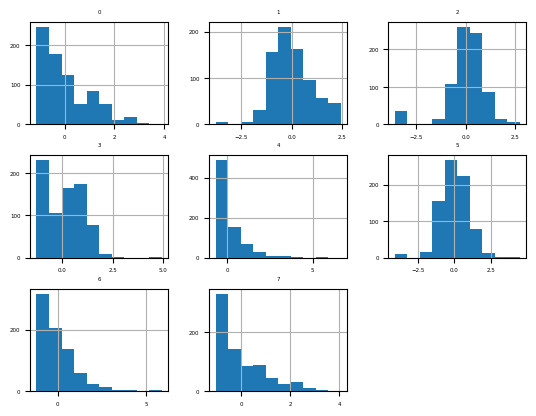

In [11]:
# visualize a standard scaler transform of the diabetes dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

# load the dataset
dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# summarize
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

Histogram plots of the variables are created, although the distributions don’t look much different from their original distributions seen in the previous section other than their scale on the x-axis

In [12]:
# evaluate knn on the diabetes dataset with standard scaler transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load the dataset
dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.741 (0.050)


#### Common Questions
+ Should I Normalize or Standardize?
    + If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
    + Complex, If you have the resources, explore modeling with the raw data, standardized data, and normalized data and see if there is a beneficial difference in the performance of the resulting model.
    + in MLP, there are a variety of practical reasons why standardizing the inputs can make training faster and reduce the chances of getting stuck in local optima.
+ Should I Standardize then Normalize?
    + This might be a good idea of you have a mixture of standardized and normalized variables and wish all input variables to have the same minimum and maximum values as input for a given algorithm, such as an algorithm that calculates distance measures.
+ How Do I Handle Out-of-Bounds Values?
    + One simple approach to handling this may be to check for such out-of-bound values and change their values to the known minimum or maximum prior to scaling.

### Chapter 18: How to Scale Data With Outliers
+ Standardization can become skewed or biased if the input variable contains outlier values.

#### Tutorial Overview
This tutorial is divided into five parts; they are:
1. Robust Scaling Data
3. Diabetes Dataset
4. IQR Robust Scaler Transform
5. Explore Robust Scaler Range

#### Robust Scaling Data
+ Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers.
+ One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.
+ The resulting variable has a zero mean and median and a standard deviation of 1, although not skewed by outliers and the outliers are still present with the same relative relationships to other values.

#### Diabetes Dataset
+ in last chapter exist

#### IQR Robust Scaler Transform

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7  
count  768.000000  768.000000  
mean     0.259807    0.249464  
std      0.866219    0.691778  
min     -0.769935   -0.470588  
25%     -0.336601   -0.294118  
50%      0.000000    0.000000  
75%      0.663399    0.705882  
max      5.352

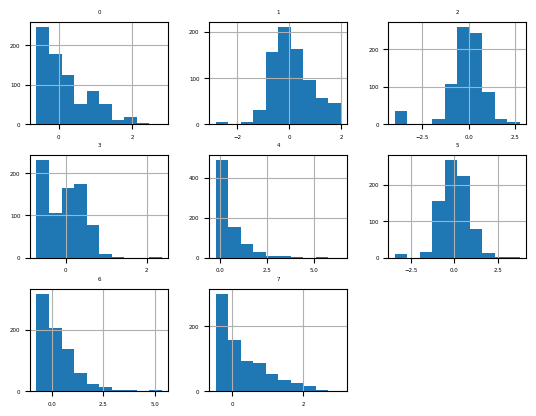

In [13]:
# visualize a standard scaler transform of the diabetes dataset

import pandas as pd
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot

# load the dataset
dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# summarize
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

Histogram plots of the variables are created, although the distributions don’t look much different from their original distributions seen in the previous section. We can see that the center of mass for each distribution is now close to zero.

In [14]:
# evaluate knn on the diabetes dataset with robust scaler transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

# load the dataset
dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = RobustScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.734 (0.044)


#### Explore Robust Scaler Range
+ Other values can be specified and might improve the performance of the model, such as a wider range, allowing fewer values to be considered outliers, or a more narrow range, allowing more values to be considered outliers.

>1 0.734 (0.054)
>5 0.736 (0.051)
>10 0.739 (0.047)
>15 0.740 (0.045)
>20 0.734 (0.050)
>25 0.734 (0.044)
>30 0.735 (0.042)


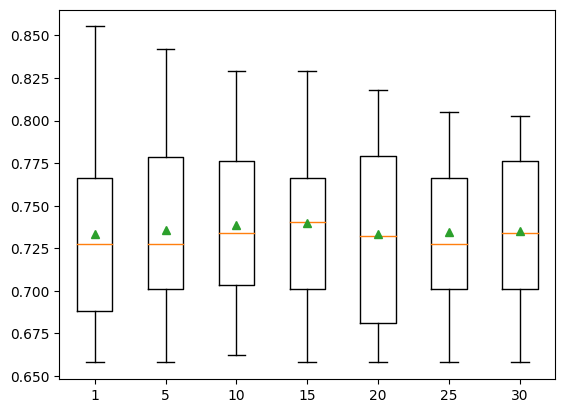

In [15]:
# explore the scaling range of the robust scaler transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
    # load dataset
    dataset = pd.read_csv('../Datasets/pima-indians-diabetes.csv', header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y
    
# get a list of models to evaluate
def get_models():
    models = dict()
    for value in [1, 5, 10, 15, 20, 25, 30]:
        # define the pipeline
        trans = RobustScaler(quantile_range=(value, 100-value))
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models
    
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
    
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Chapter 19: How to Encode Categorical Data

#### Tutorial Overview
This tutorial is divided into six parts; they are:
1. Nominal and Ordinal Variables
2. Encoding Categorical Data
3. OrdinalEncoder Transform
4. OneHotEncoder Transform

#### Nominal and Ordinal Variables
+ Nominal Variable. Variable comprises a finite set of discrete values with no rank-order
relationship between values.
+ Ordinal Variable. Variable comprises a finite set of discrete values with a ranked
ordering between values.
+ Some algorithms can work with categorical data directly (decision tree)

#### Encoding Categorical Data
+ Ordinal Encoding (Label Encoding)
    + An integer ordinal encoding is a natural encoding for ordinal variables. For categorical variables, it imposes an ordinal relationship where no such relationship may exist. This can cause problems and a one hot encoding may be used instead.
+ One Hot Encoding
    + Each bit represents a possible category. If the variable cannot belong to multiple categories at once, then only one bit in the group can be “on”. This is called one-hot encoding
+ Dummy Variable Encoding
    + represents C categories with C − 1 binary variables.
    + When there are C possible values of the predictor and only C − 1 dummy variables are used, the matrix inverse can be computed and the contrast method is said to be a full rank parameterization
    + In addition to being slightly less redundant, a dummy variable representation is required for some models.

#### OrdinalEncoder Transform

In [18]:
# evaluate logistic regression on the breast cancer dataset with an ordinal encoding

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

# load the dataset
dataset = pd.read_csv('../Datasets/breast-cancer.csv', header=None)

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression()

# fit on the training set
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


#### OneHotEncoder Transform

In [22]:
# evaluate logistic regression on the breast cancer dataset with a one-hot encoding

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# load the dataset
dataset = pd.read_csv('../Datasets/breast-cancer.csv', header=None)

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# one-hot encode input variables
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression()

# fit on the training set
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.53


### Chapter 20: How to Make Distributions More Gaussian

#### Tutorial Overview
This tutorial is divided into five parts; they are:
1. Make Data More Gaussian
2. Power Transforms
3. Sonar Dataset
4. Box-Cox Transform
5. Yeo-Johnson Transform

#### Make Data More Gaussian
+ Some algorithms like linear regression and logistic regression explicitly assume the real-valued variables have a Gaussian distribution. Other nonlinear algorithms may not have this assumption, yet often perform better when variables have a Gaussian distribution.
+  These transforms are most effective when the data distribution is nearly-Gaussian to begin with and is afflicted with a skew or outliers.
+  Another common reason for transformations is to remove distributional skewness. An un-skewed distribution is one that is roughly symmetric. This means that the probability of falling on either side of the distribution’s mean is roughly equal

#### Power Transforms
+ make the probability distribution of a variable more Gaussian
+ removing a skew in the distribution
+ stabilizing the variance of the distribution
+ Replacing the data with the log, square root, or inverse may help to remove the skew.
+ statistical methods can be used to empirically identify an appropriate transformation. Box and Cox (1964) propose a family of transformations that are indexed by a parameter, denoted as λ
+ Below are some common values for lambda
    + λ = −1.0 is a reciprocal transform.
    + λ = −0.5 is a reciprocal square root transform.
    + λ = 0.0 is a log transform.
    + λ = 0.5 is a square root transform.
    + λ = 1.0 is no transform

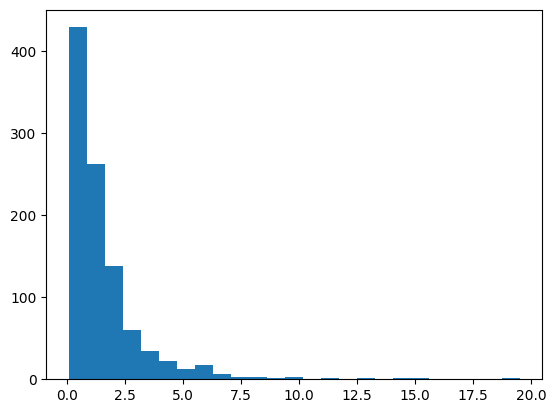

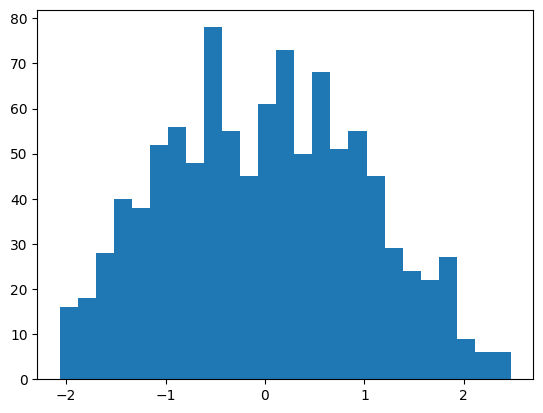

In [24]:
# demonstration of the power transform on data with a skew

import numpy as np
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# generate gaussian data sample
data = np.random.randn(1000)

# add a skew to the data distribution
data = np.exp(data)

# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()

# reshape data to have rows and columns
data = data.reshape((len(data),1))

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)

# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

#### Sonar Dataset

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

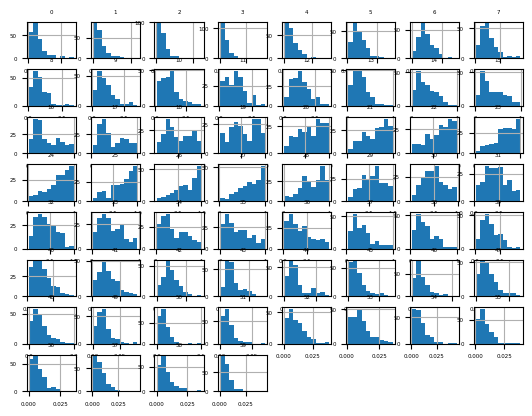

In [25]:
# load and summarize the sonar dataset

import pandas as pd
from matplotlib import pyplot

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

##### Box-Cox Transform
+ It is important to note that the Box-Cox procedure can only be applied to data that is strictly positive.

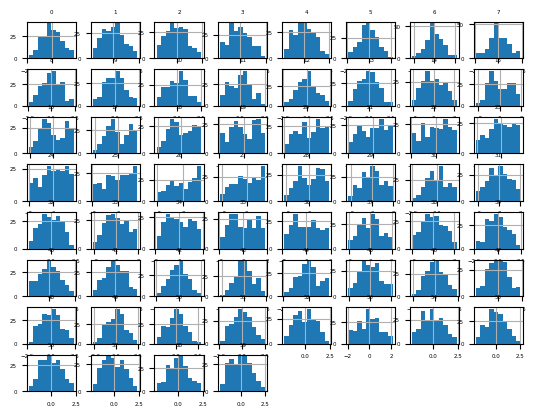

In [27]:
# visualize a box-cox transform of the scaled sonar dataset

import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

In [29]:
# evaluate knn on the box-cox sonar dataset

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.811 (0.085)


In [ ]:
#### Yeo-Johnson Transform

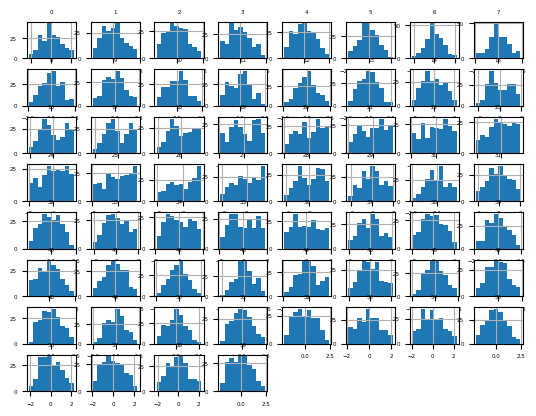

In [32]:
# visualize a yeo-johnson transform of the sonar dataset

import pandas as pd
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# Load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

In [34]:
# evaluate knn on the yeo-johnson sonar dataset

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.808 (0.082)


Sometimes a lift in performance can be achieved by first standardizing the raw dataset prior to performing a Yeo-Johnson transform.

In [36]:
# evaluate knn on the yeo-johnson standardized sonar dataset

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.816 (0.077)


### Chapter 21: How to Change Numerical Data Distributions

#### Tutorial Overview
This tutorial is divided into five parts; they are:
1. Quantile Transforms
2. Sonar Dataset
3. Normal Quantile Transform
4. Uniform Quantile Transform

#### Quantile Transforms
+ A quantile transform will map a variable’s probability distribution to another probability distribution.
+ A CDF is a function that returns the probability of a value at or below a given value. The PPF is the inverse of this function and returns the value at or below a given probability.
+ The quantile function ranks or smooths out the relationship between observations and can be mapped onto other distributions

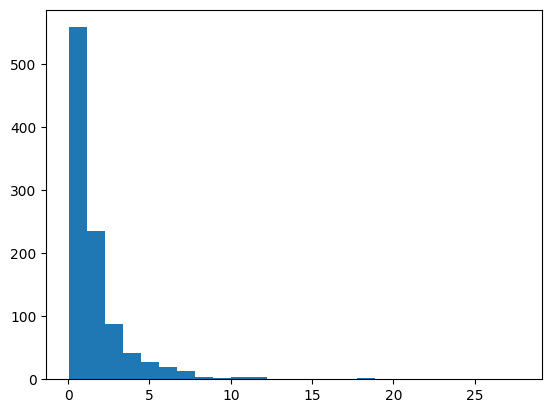

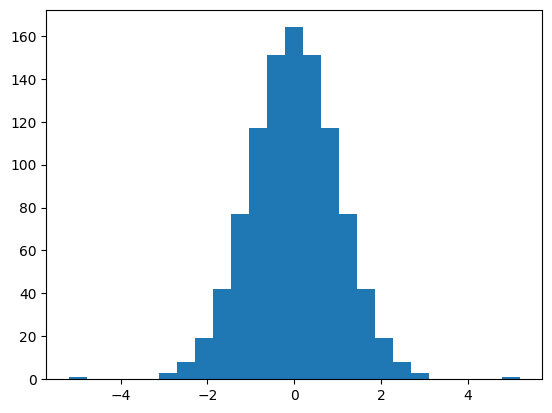

In [39]:
# demonstration of the quantile transform

import numpy as np
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

# generate gaussian data sample
data = np.random.randn(1000)

# add a skew to the data distribution
data = np.exp(data)

# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()

# reshape data to have rows and columns
data = data.reshape((len(data),1))

# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)

# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

#### Sonar Dataset
+ exist in before chapter

#### Normal Quantile Transform

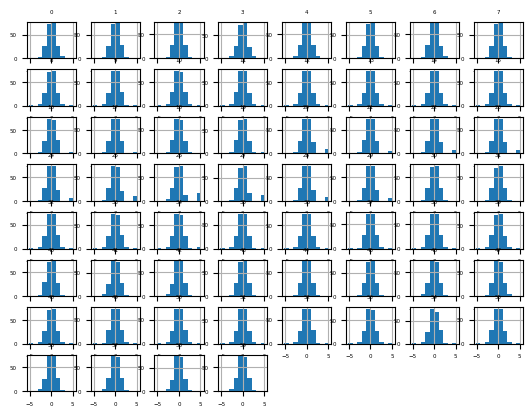

In [41]:
# visualize a normal quantile transform of the sonar dataset

import pandas as pd
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

In [42]:
# evaluate knn on the sonar dataset with normal quantile transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.817 (0.087)


#### Uniform Quantile Transform

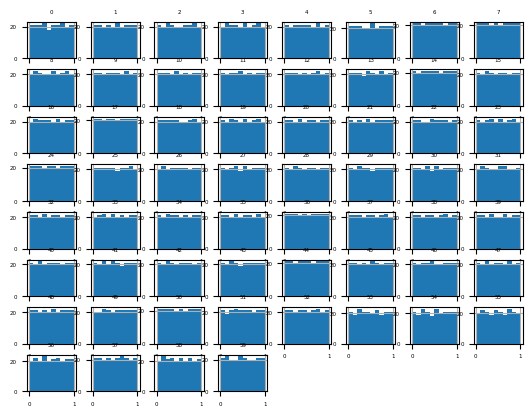

In [43]:
# visualize a normal quantile transform of the sonar dataset

import pandas as pd
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

In [44]:
# evaluate knn on the sonar dataset with normal quantile transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.845 (0.074)


We chose the number of quantiles as an arbitrary number, in this case, 100. This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting skill of the model.

>1 0.466 (0.016)
>2 0.813 (0.085)
>3 0.840 (0.080)
>4 0.854 (0.075)
>5 0.848 (0.072)
>6 0.851 (0.071)
>7 0.845 (0.071)
>8 0.848 (0.066)
>9 0.848 (0.071)
>10 0.843 (0.074)
>11 0.838 (0.069)
>12 0.838 (0.069)
>13 0.846 (0.071)
>14 0.842 (0.071)
>15 0.845 (0.068)
>16 0.841 (0.074)
>17 0.846 (0.071)
>18 0.842 (0.075)
>19 0.840 (0.075)
>20 0.838 (0.076)
>21 0.843 (0.071)
>22 0.845 (0.073)
>23 0.843 (0.068)
>24 0.845 (0.072)
>25 0.840 (0.077)
>26 0.843 (0.072)
>27 0.842 (0.073)
>28 0.840 (0.076)
>29 0.845 (0.072)
>30 0.840 (0.075)
>31 0.838 (0.076)
>32 0.842 (0.075)
>33 0.843 (0.074)
>34 0.843 (0.075)
>35 0.842 (0.075)
>36 0.843 (0.073)
>37 0.842 (0.075)
>38 0.843 (0.075)
>39 0.840 (0.076)
>40 0.845 (0.074)
>41 0.841 (0.072)
>42 0.842 (0.075)
>43 0.842 (0.074)
>44 0.843 (0.074)
>45 0.840 (0.076)
>46 0.842 (0.075)
>47 0.845 (0.072)
>48 0.842 (0.073)
>49 0.840 (0.073)
>50 0.842 (0.072)
>51 0.842 (0.075)
>52 0.845 (0.071)
>53 0.843 (0.075)
>54 0.845 (0.074)
>55 0.838 (0.076)
>56 0.846 (0.073)
>

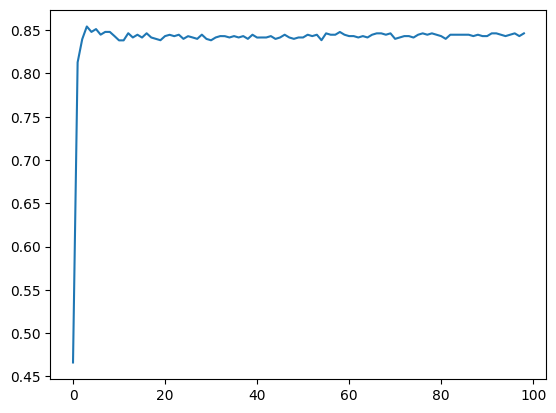

In [47]:
# explore number of quantiles on classification accuracy

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = pd.read_csv(filename, header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y
    
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,100):
        # define the pipeline
        trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform')
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models
    
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
    
# define dataset
X, y = get_dataset('../Datasets/sonar.csv')

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results = list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(np.mean(scores))
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
pyplot.plot(results)
pyplot.show()

The results highlight that there is likely some benefit in exploring different distributions and number of quantiles to see if better performance can be achieved.

### Chapter 22 How to Transform Numerical to Categorical Data

#### Tutorial Overview
This tutorial is divided into six parts; they are:
1. Change Data Distribution
2. Discretization Transforms
3. Sonar Dataset
4. Uniform Discretization Transform
5. k-Means Discretization Transform
6. Quantile Discretization Transform

#### Change Data Distribution
+ Some machine learning algorithms may prefer or require categorical or ordinal input variables, such as some decision tree and rule-based algorithms.
+ One approach is to use a transform of the numerical variable to have a discrete probability distribution where each numerical value is assigned a label and the labels have an ordered (ordinal) relationship. 

#### Discretization Transforms
+ A discretization transform will map numerical variables onto discrete values.
+ Values for the variable are grouped together into discrete bins and each bin is assigned a unique integer such that the ordinal relationship between the bins is preserved.
+ Different methods for grouping the values into k discrete bins can be used
    + Uniform: Each bin has the same width in the span of possible values for the variable.
    + Quantile: Each bin has the same number of values, split based on percentiles.
    + Clustered: Clusters are identified and examples are assigned to each group.

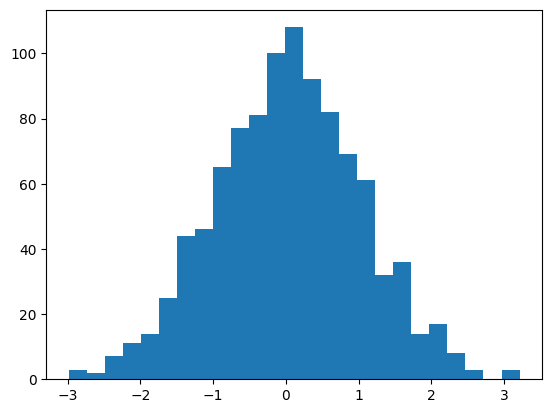

[[3.]
 [6.]
 [6.]
 [4.]
 [6.]
 [4.]
 [3.]
 [5.]
 [3.]
 [7.]]


/home/influx/.conda/envs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


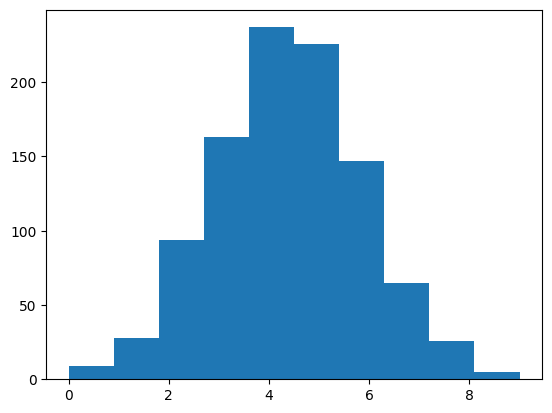

In [51]:
# demonstration of the discretization transform

import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot

# generate gaussian data sample
data = np.random.randn(1000)

# histogram of the raw data
pyplot.hist(data, bins=25)
pyplot.show()

# reshape data to have rows and columns
data = data.reshape((len(data),1))

# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(data)

# summarize first few rows
print(data_trans[:10, :])

# histogram of the transformed data
pyplot.hist(data_trans, bins=10)
pyplot.show()

#### Sonar Dataset
+ exist in before chapter

#### Uniform Discretization Transform
+ A uniform discretization transform will preserve the probability distribution of each input variable but will make it discrete with the specified number of ordinal groups or labels. 

/home/influx/.conda/envs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


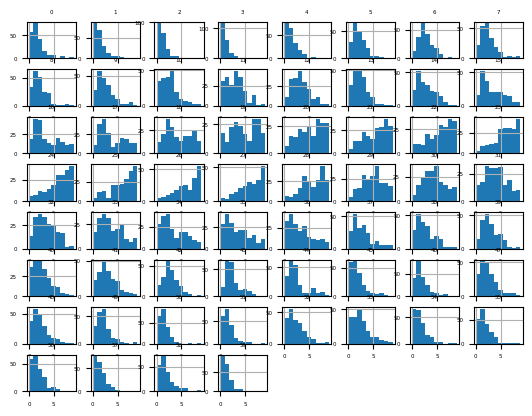

In [55]:
# visualize a uniform ordinal discretization transform of the sonar dataset

import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

In [56]:
# evaluate knn on the sonar dataset with uniform ordinal discretization transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.829 (0.079)


/home/influx/.conda/envs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/influx/.conda/envs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/influx/.conda/envs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/influx/.conda/envs/ML/lib

#### k-Means Discretization Transform
+ A k-means discretization transform will attempt to fit k clusters for each input variable and then assign each observation to a cluster

/home/influx/.conda/envs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


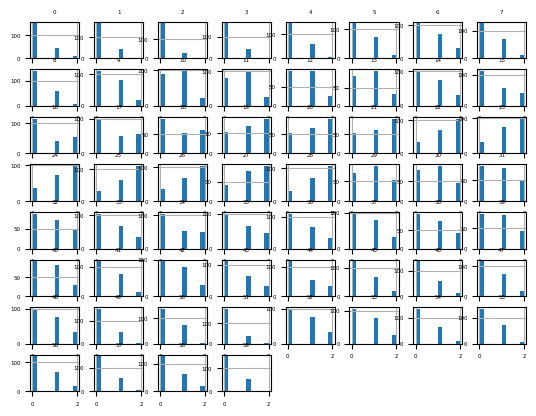

In [62]:
# visualize a kmeans ordinal discretization transform of the sonar dataset

import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

In [63]:
# evaluate knn on the sonar dataset with kmeans ordinal discretization transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

/home/influx/.conda/envs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/influx/.conda/envs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/influx/.conda/envs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/influx/.conda/envs/ML/lib

Accuracy: 0.821 (0.089)


#### Quantile Discretization Transform
+ A quantile discretization transform will attempt to split the observations for each input variable into k groups, where the number of observations assigned to each group is approximately equal. Unless there are a large number of observations or a complex empirical distribution, the number of bins must be kept small, such as 5-10.

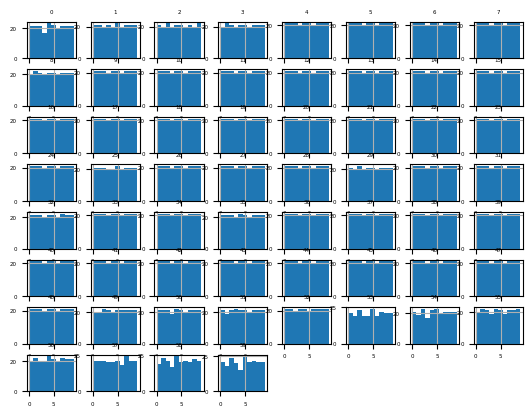

In [64]:
# visualize a quantile ordinal discretization transform of the sonar dataset

import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

In [65]:
# evaluate knn on the sonar dataset with quantile ordinal discretization transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.840 (0.072)


We chose the number of bins as an arbitrary number; in this case, 10. This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting skill of the model. 

>2 0.822 (0.077)
>3 0.878 (0.053)
>4 0.836 (0.083)
>5 0.840 (0.069)
>6 0.843 (0.069)
>7 0.854 (0.071)
>8 0.838 (0.077)
>9 0.841 (0.069)
>10 0.840 (0.072)


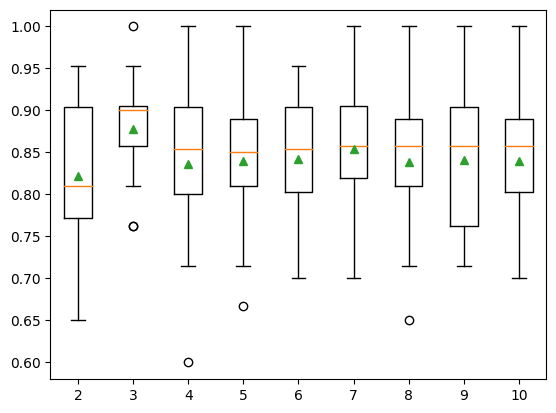

In [67]:
# explore number of discrete bins on classification accuracy

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
    # load dataset
    dataset = pd.read_csv('../Datasets/sonar.csv', header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y
    
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2,11):
        # define the pipeline
        trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models
    
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
    
# get the dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Chapter 23: How to Derive New Input Variables
+ Often, the input features for a predictive modeling task interact in unexpected and often nonlinear ways. These interactions can be identified and modeled by a learning algorithm.
+ Another approach is to engineer new features that expose these interactions and see if they improve model performance.
+ Additionally, transforms like raising input variables to a power can help to better expose the important relationships between input variables and the target variable.
+ Input features for predictive modeling often interact in nonlinear ways, which can be identified by learning algorithms or through feature engineering. Creating interaction and polynomial features can help expose these relationships, allowing simpler models to perform better by shifting complexity to data preparation.
+ However, this approach can significantly increase the number of input variables, sometimes by thousands or millions, potentially enhancing model performance.


#### Tutorial Overview
This tutorial is divided into five parts; they are:
1. Polynomial Features
2. Sonar Dataset
3. Polynomial Feature Transform Example
4. Effect of Polynomial Degree

#### Polynomial Features
+ Generally speaking, it is unusual to use d greater than 3 or 4 because for large values of d, the polynomial curve can become overly flexible and can take on some very strange shapes.
+ features created by raising existing features to an exponent.
+ variables that represent the interaction between features

#### Sonar Dataset
+ exist before

#### Polynomial Feature Transform Example

In [2]:
# evaluate knn on the sonar dataset with polynomial features transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# load dataset
dataset = pd.read_csv('../Datasets/sonar.csv', header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.800 (0.077)


>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)


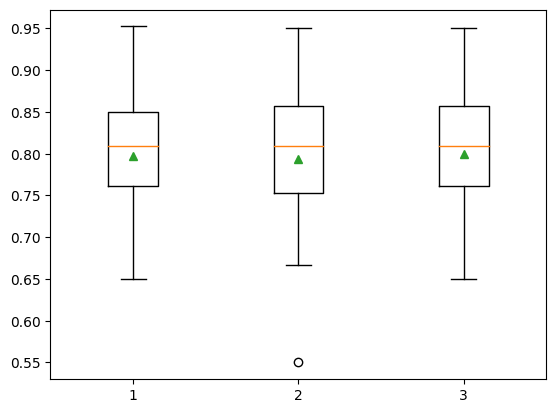

In [6]:
# explore the effect of degree on accuracy for the polynomial features transform

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = pd.read_csv(filename, header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y
    
# get a list of models to evaluate
def get_models():
    models = dict()
    for d in range(1, 4):
        # define the pipeline
        trans = PolynomialFeatures(degree=d)
        model = KNeighborsClassifier()
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models
    
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
    
# define dataset
X, y = get_dataset('../Datasets/sonar.csv')

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()